In [10]:
import pandas as pd
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews['num_letters'] = reviews.review_comment_message.str.count('[a-zA-Z]')
reviews = reviews[reviews.num_letters > 0]  # Filter valid comments
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,num_letters
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,31.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,82.0
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,139.0


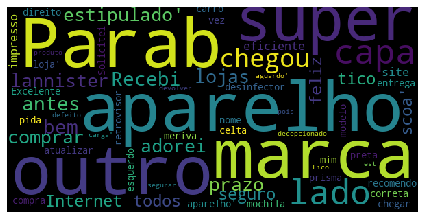

In [22]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
def plot_wordcloud(text,stop_words):
    wordcloud = WordCloud(background_color='black',
                         stopwords=stop_words,
                         max_words=200,
                         max_font_size=100,
                         random_state=520,
                         width=600,
                         height=300,
                         mask=None)
    wordcloud.generate(text)
#     plt.figure(figsize=(24,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout()
stop_words = stopwords.words('portuguese')
comment = str(reviews.review_comment_message.values)
plot_wordcloud(comment,stop_words)

In [23]:
# NLP
import nltk 
import numpy as np
import seaborn as sns

In [24]:
from googletrans import Translator
translator = Translator()
def translation_pt(text):
    translations = translator.translate(list(text))
    translation_text = pd.Series(translation.text for translation in translations).values
    return translation_text

In [25]:
from nltk import FreqDist
def freq_words(x,terms = 20):
    all_words = ' '.join(text for text in x)
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    d = words_df.nlargest(columns='count',n=terms)
    d['word'] = translation_pt(d.word)
    plt.figure(figsize=(60,30))
    ax = sns.barplot(data=d,x='word',y='count')
    plt.yticks(fontsize=30)
    plt.xticks(fontsize=30)
    plt.xlabel('word',fontsize=40)
    plt.ylabel('count',fontsize=40)
    plt.show()

In [26]:
# freq_words(reviews.review_comment_message)

In [32]:
# remove unwanted characters, numbers and symbols
reviews['review_comment_message'] = reviews['review_comment_message'].str.replace("[^a-zA-Z#]"," ")
# remove short words(length<3)
reviews['review_comment_message'] = reviews['review_comment_message'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
# correct the mistakes in the text
reviews_data1 = correct_spelling(reviews['review_comment_message'])

# remove stopwords
stop_words.extend(['é', 'ok', 'ta', 'tá', 'att', 'att.', 'sr', 'porém','produto', 'recomendo','timo','corretar','correar'])
out = []
reviews_data2 = []
for tokens in reviews_data1:
    for tk in tokens.split():
        if tk not in stop_words:
            out.append(tk)
    a = ' '.join(com for com in out)
    reviews_data2.append(a)
    out = []
stemmer = nltk.stem.RSLPStemmer()
out = []
reviews_data3 = []
for tokens in reviews_data2:
    for tk in tokens.split():
        a = stemmer.stem(tk)
        out.append(a)
    b = ' '.join(com for com in out)
    reviews_data3.append(b)
    out = []
   



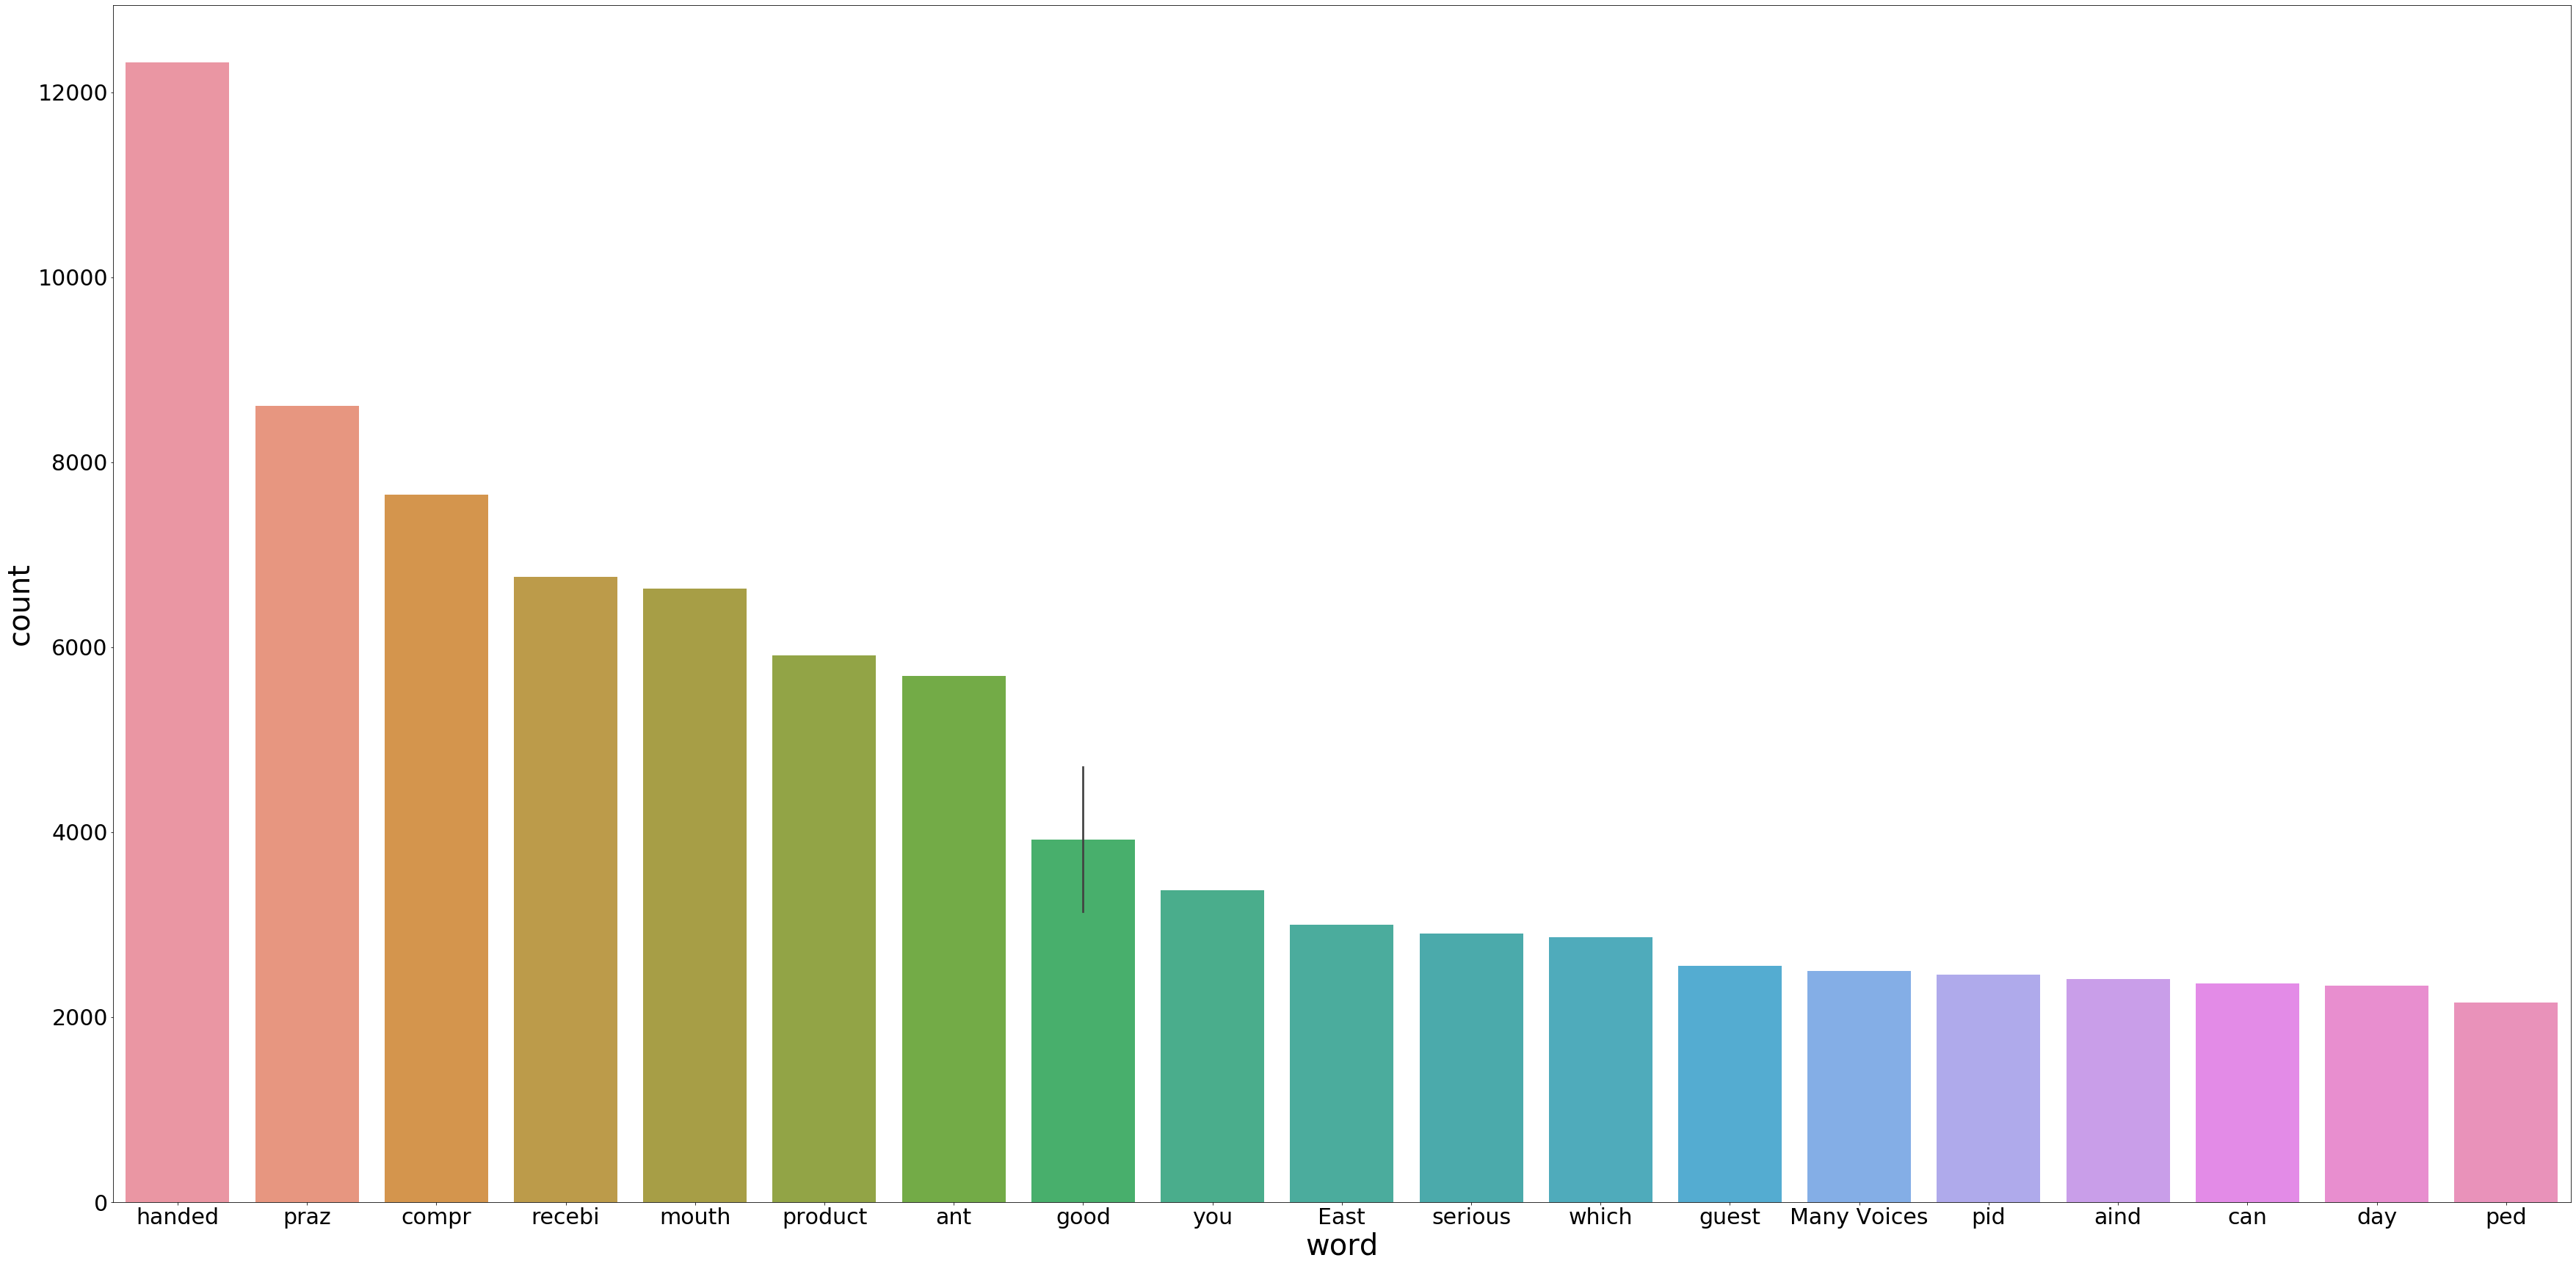

In [33]:
freq_words(reviews_data3)

In [31]:
# remove stopwords
stop_words.extend(['é', 'ok', 'ta', 'tá', 'att', 'att.', 'sr', 'porém','produto', 'recomendo','timo','corretar','correar'])
def remove_stopwords(comments):
    return [[tk for tk in tokens if tk not in stop_words] for tokens in comments]

In [30]:
def correct_spelling(comments):
    mistake_dict = {
            'decpcionou': 'decepcionou', 'tô': 'estou', 'to': 'estou',
            'q': 'que', 'pq': 'porque', 'mt': 'muito', 'muiiita': 'muita',
            'estaav': 'estava', 'acabento': 'acabamento', 'orrivel': 'horrível',
            'sertões': 'certos', 'vcs': 'vocês', 'msg': 'mensagem', 'dta': 'data',
            'ñ': 'não', 'n': 'não', 'grates': 'grátis', 'testa-lo': 'testar',
            'superandoo': 'superando', 'atentimento': 'atendimento',
            'cancelacem': 'cancelassem', 'msm': 'mesmo', 'protudo': 'produto',
            'decrarar': 'declarar', 'trasporte': 'transporte', 'decpsionei': 'decepcionei',
            'empuerada': 'empoeirada', 'recebie': 'recebi', 'superr': 'super',
            'nao': 'não', 'mto': 'muito', 'tb': 'também', 'execelente': 'excelente',
            'tao': 'tão', 'blz': 'beleza'
        }
    return [' '.join([mistake_dict[tk] if tk in mistake_dict else tk for tk in tokens.split()])
           for tokens in comments]

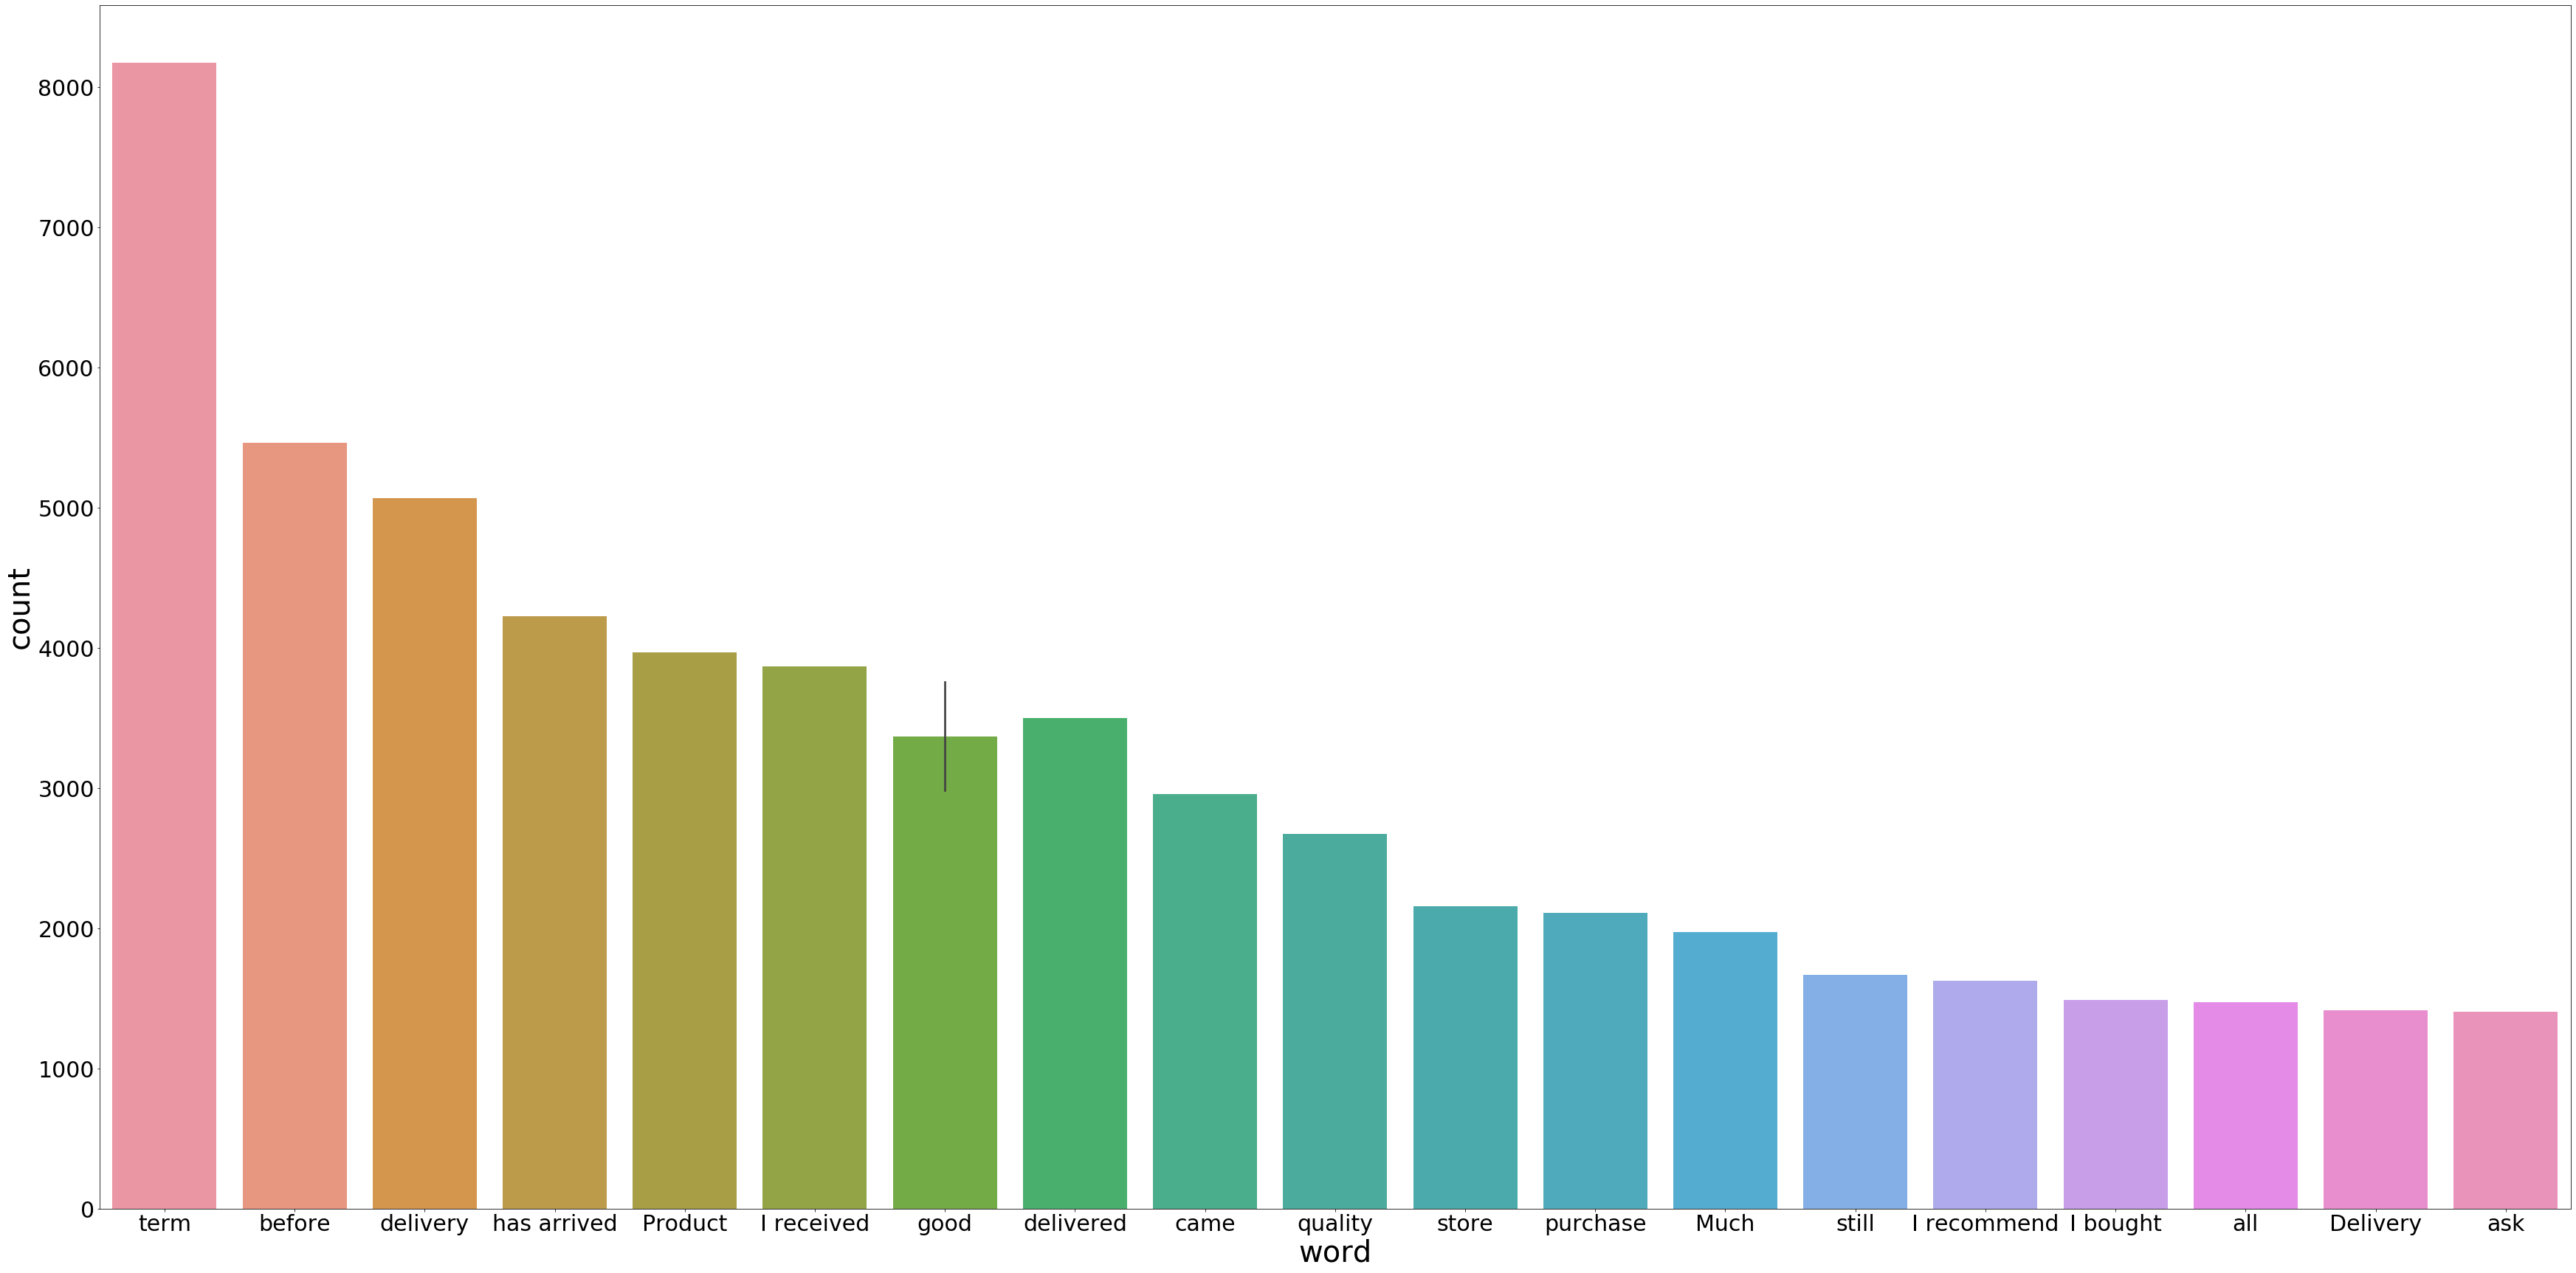

In [34]:
freq_words(reviews_data2)

In [35]:
import spacy
nlp = spacy.load("pt_core_news_sm",disable=['parser','ner'])
def lemmatization(texts,tags=['NOUN','ADJ']):
    output = []
    for sent in texts:
        doc = nlp(' '.join(sent))
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [38]:
print(reviews_data3[15])


boa


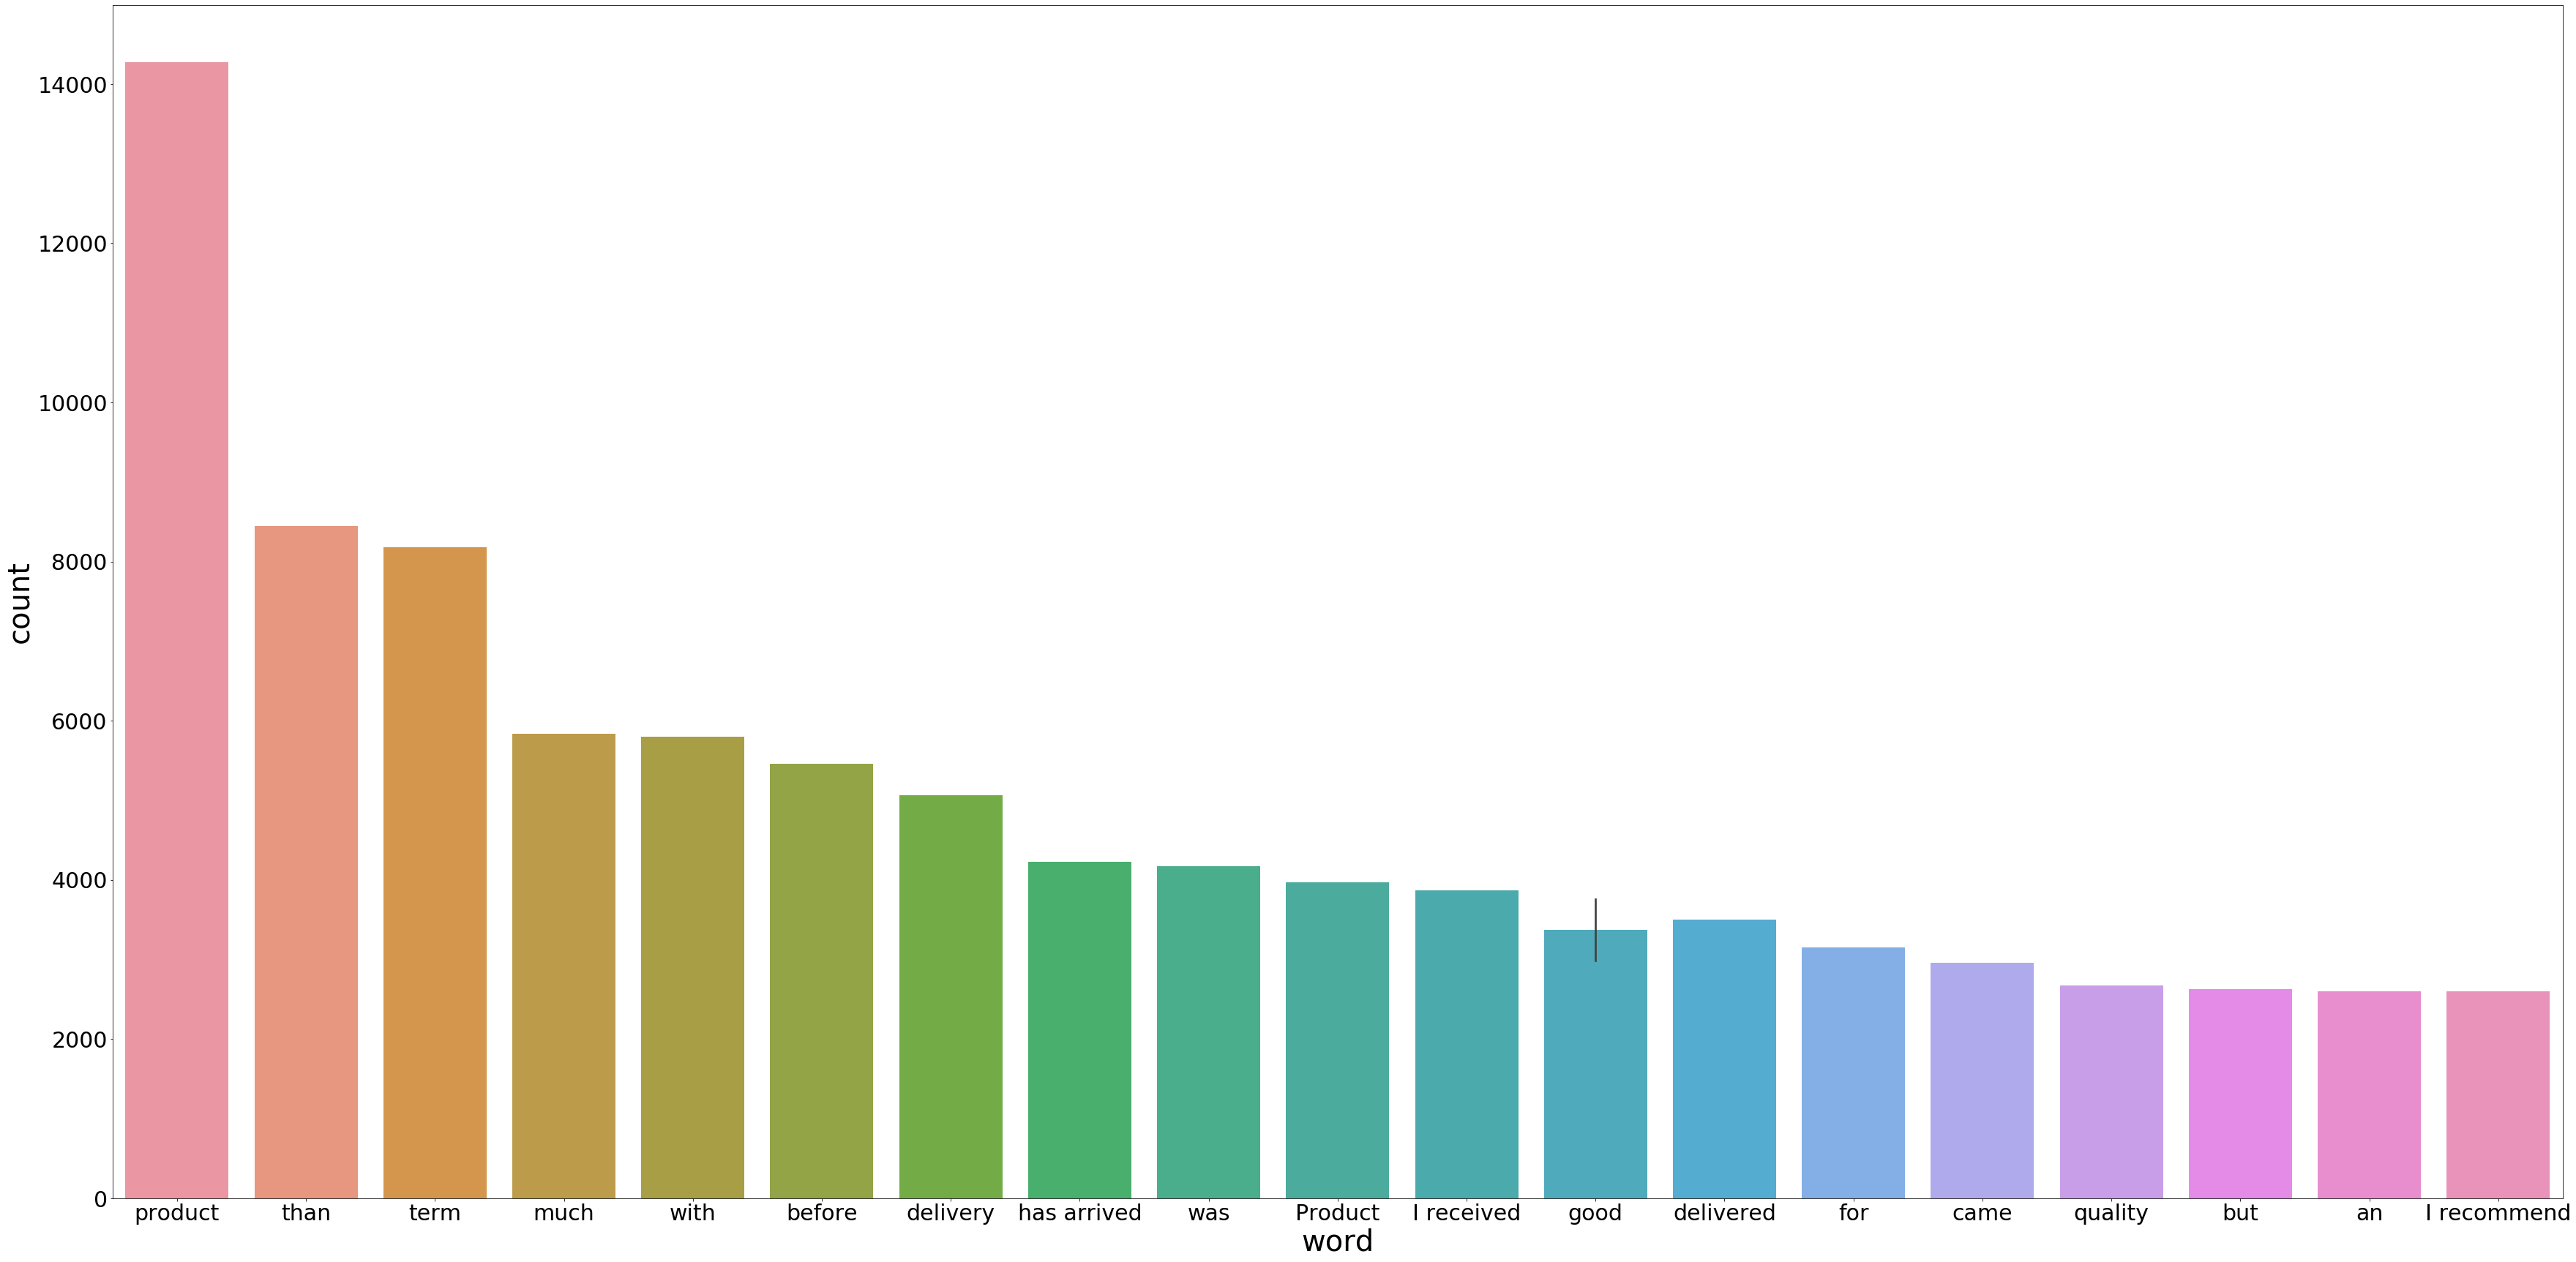

In [48]:
freq_words(reviews.review_comment_message)

In [49]:
def print_topics(components,feature_names,num_words):
    for topic_idx, topic in enumerate(components):
        message = 'Topic%d:'%(topic_idx+1)
        translated_terms = translation_pt

In [50]:
from sklearn.decomposition import LatentDirichletAllocation,NMF
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', 
                             max_df = 0.95, 
                            min_df=2)
X = vectorizer.fit_transform(reviews.review_comment_message)
X.shape 


(41566, 6948)

In [52]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = NMF(n_components=3, solver='mu', 
                beta_loss='kullback-leibler',
                alpha=0.1,l1_ratio=0.5, random_state=500)

svd_model.fit(X)

svd_model.components_

array([[1.14478700e-03, 3.57742659e-04, 8.13381685e-04, ...,
        2.70989731e-04, 1.72854669e-04, 2.34072804e-04],
       [0.00000000e+00, 0.00000000e+00, 1.95230904e-10, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [53]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:8]
    translated_terms = translation_pt([sorted_terms[i][0] for i in range(8)])
    print("Topic "+str(i)+": "+str(translated_terms))
#     for t in translated_terms:
#         print(t)

Topic 0: ['product' 'before' 'term' 'has arrived' 'with' 'delivered' 'I received'
 'delivery']
Topic 1: ['good' 'much' 'attendance' 'bonita' 'Dear' 'mto' 'taste' 'tico']
Topic 2: ['I recommend' 'product' 'delivery' 'Excellent' 'timo' 'liked it'
 'quality' 'ask']
